Hello
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
years  40  max  2020.0  min  1980.0


<AxesSubplot:xlabel='year'>

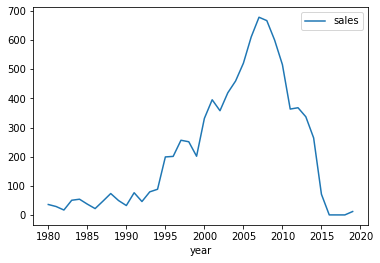

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

print("Hello")
path = str(pathlib.Path().resolve())+"/vgsales.csv"
data = pd.read_csv(path)
print(data.head())
year_publisher_gsales = data[["Year","Publisher","Global_Sales"]]
sorted = year_publisher_gsales.sort_values(by="Year").head()
year_sales = year_publisher_gsales[["Year", "Global_Sales"]]
year_min = year_sales["Year"].min()
year_max = year_sales["Year"].max()
years = int(year_sales["Year"].max()-year_sales["Year"].min())
print("years ", years, " max ", year_max, " min ", year_min)
year_sales_cumulative = [0]*years #np.zeros([1, years], dtype=int)
years_x = []
for row in year_sales.iterrows():
    try:
        year_sales_cumulative[int(row[1]["Year"]-year_min)-1] += row[1]["Global_Sales"]
    except:
        # print("error on year: ", row[1]["Year"])
        pass
for i in range(years):
    years_x.append(i+year_min)

df = pd.DataFrame(data={"year":years_x, "sales":year_sales_cumulative})
df.plot(x="year",y="sales")
# plt.plot(years_x, year_sales_cumulative)
# plt.show()
